In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

# Importing Important Libraries

In [1]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D

2024-05-02 12:36:34.518605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jahnavireddy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
seed_constant = 5
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

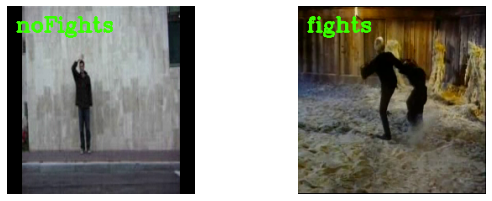

In [4]:
plt.figure(figsize = (20, 20))

all_classes_names = os.listdir('/Users/jahnavireddy/Desktop/HARFD/ProjectCode/Peliculas')

# random_range = random.sample(range(len(all_classes_names)), len(all_classes_names))

for counter, random_index in enumerate(range(len(all_classes_names)), 1):

    selected_class_Name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'/Users/jahnavireddy/Desktop/HARFD/ProjectCode/Peliculas/{selected_class_Name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'/Users/jahnavireddy/Desktop/HARFD/ProjectCode/Peliculas/{selected_class_Name}/{selected_video_file_name}')
    video_reader.set(1, 25)

    _, bgr_frame = video_reader.read()

    bgr_frame = cv2.resize(bgr_frame ,(224,224))
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (57, 255, 0), 2)

    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [5]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 20

DATASET_DIR = "/Users/jahnavireddy/Desktop/HARFD/ProjectCode/Peliculas"

CLASSES_LIST = ["noFights", "fights"]

# Data Preprocessing

In [6]:
def frames_extraction(video_path):

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)

    video_reader.release()

    return frames_list

features: A list containing the extracted frames of the videos.

labels:  A list containing the indexes of the classes associated with the videos.

In [7]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')

        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:

            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:

                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [8]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: noFights
Extracting Data of Class: fights


Using Keras to_categorical method to convert labels into one-hot-encoded vectors

In [9]:
one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [10]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)
features = None
labels = None

# Creating Model

LRCN -> Long-term Recurrent Convolutional Network

In [11]:
def create_LRCN_model():

    model = Sequential()

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu'), input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Conv2D(256, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    #model.add(TimeDistributed(Conv2D(512, (3, 3), padding='same',activation = 'relu')))
    #model.add(TimeDistributed(MaxPooling2D((2, 2))))

    # model.add(TimeDistributed(Conv2D(1024, (3, 3), padding='same',activation = 'relu')))
    # model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    # model.add(LSTM(128, return_sequences=True))
    # model.add(LSTM(64))

    # model.add(Dense(256, activation='relu'))

    # model.add(Dense(len(CLASSES_LIST), activation='softmax'))

    #model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))


    model.summary()

    return model

In [12]:
model = create_LRCN_model()
input_shape = model.input_shape
print(input_shape)

/Users/jahnavireddy/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 20, 64, 64, 32) │           896 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 20, 16, 16, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 20, 16, 16, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 20, 4, 4, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 20, 4, 4, 128)  │        73,856 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 20, 2, 2, 128)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 20, 2, 2, 256)  │       295,168 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 20, 1, 1, 256)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 20, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,474 (1.62 MB)

 Trainable params: 425,474 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

(None, 20, 64, 64, 3)


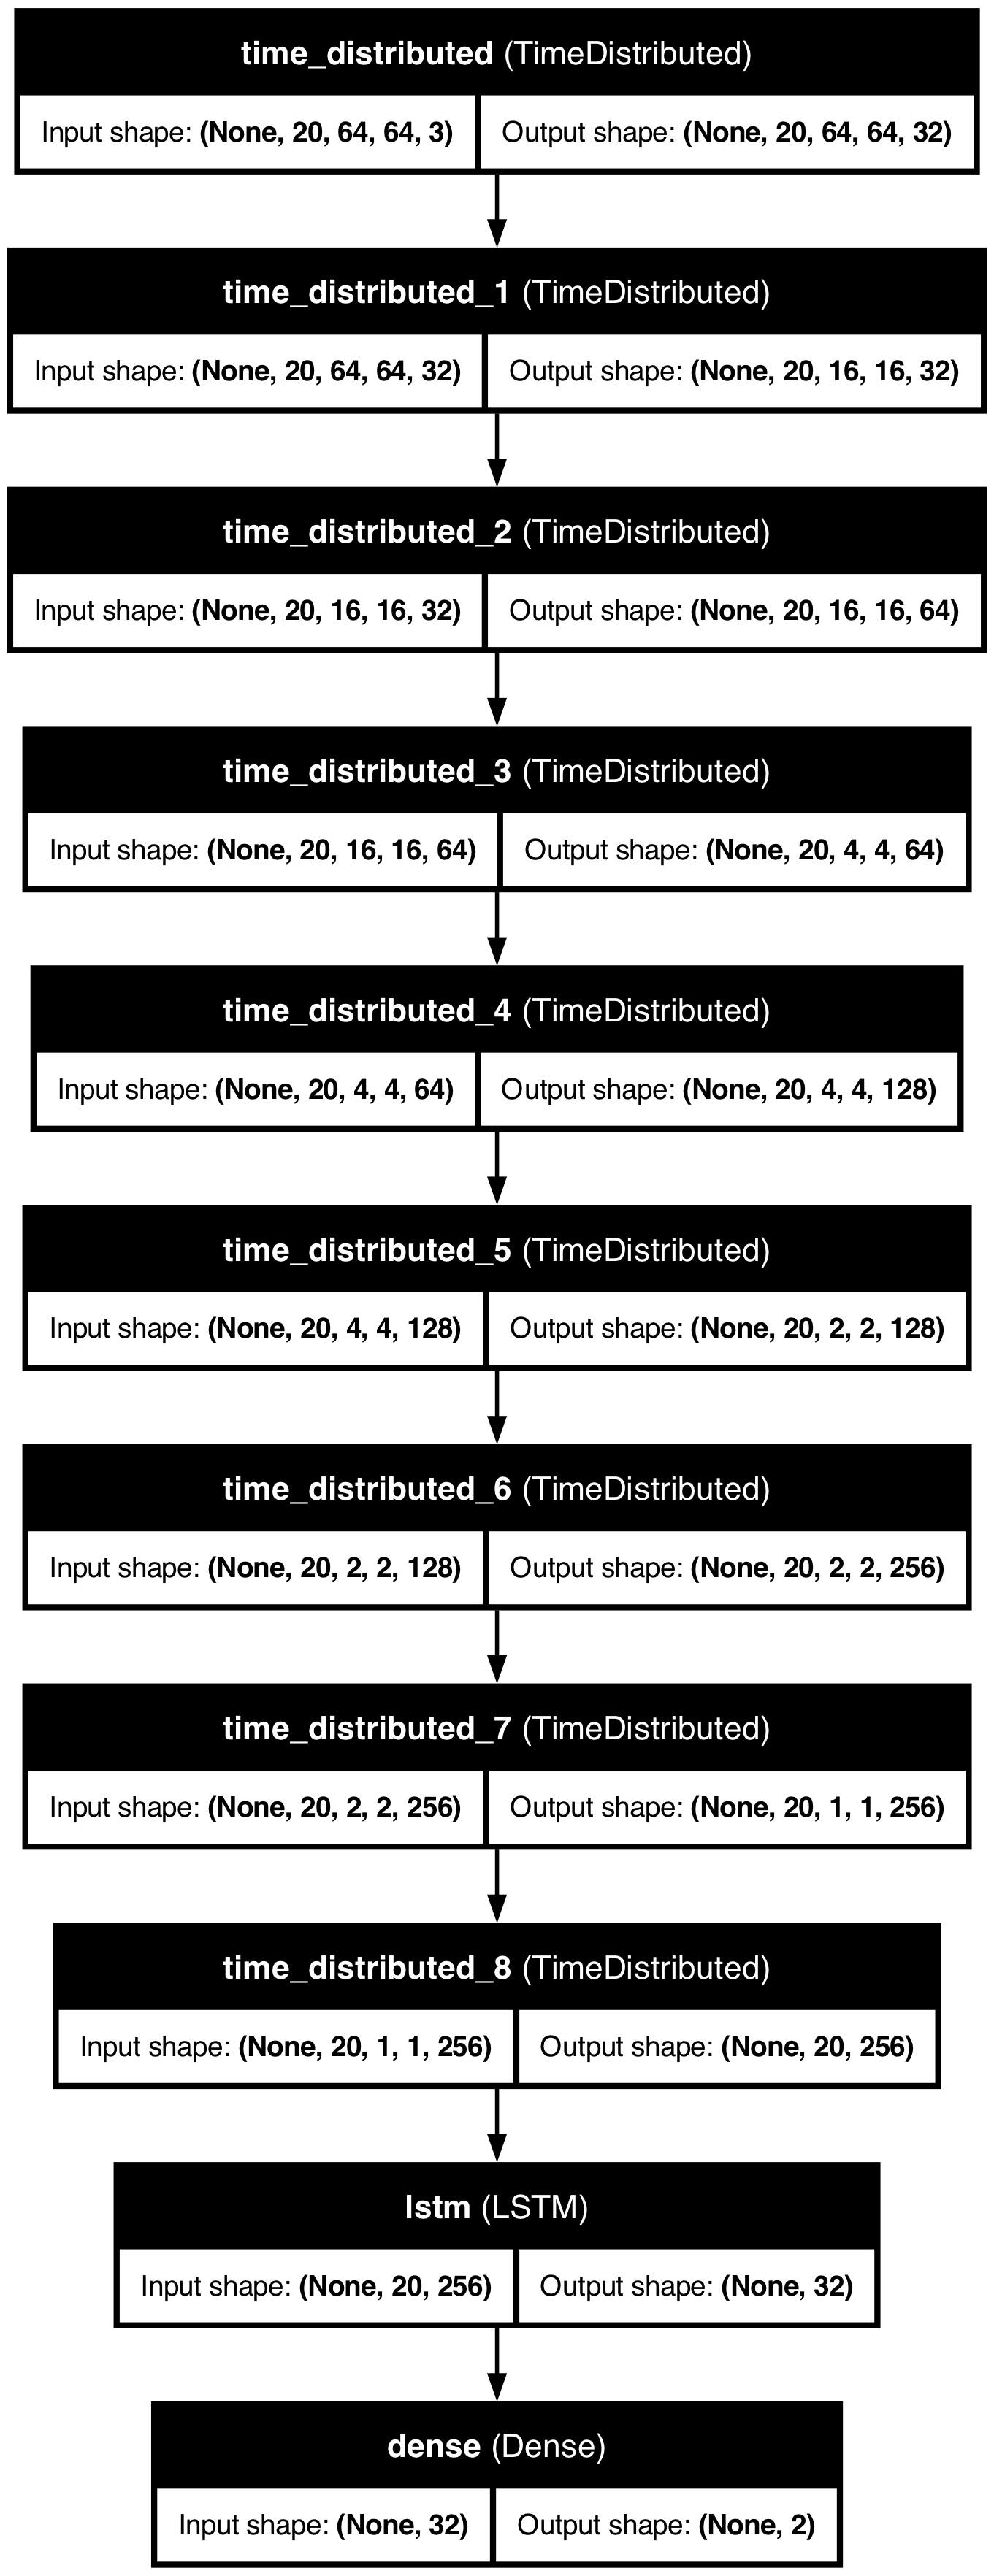

In [13]:
plot_model(model, to_file='Suspicious_Human_Activity_LRCN_Model.png', show_shapes=True, show_layer_names=True)


In [14]:
#pip install pydot-ng

# Model Training

In [15]:
def add_noise(data, noise_factor=0.2):
    noise = np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise_factor * noise
    return np.clip(noisy_data, 0.0, 1.0)
noisy_features_train = add_noise(features_train)

early_stopping_callback = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = noisy_features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.25, callbacks = [early_stopping_callback])

Epoch 1/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 783ms/step - accuracy: 0.6050 - loss: 0.7065 - val_accuracy: 1.0000 - val_loss: 0.5413
Epoch 2/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 712ms/step - accuracy: 0.8604 - loss: 0.4781 - val_accuracy: 0.9737 - val_loss: 0.1123
Epoch 3/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 719ms/step - accuracy: 0.8745 - loss: 0.4092 - val_accuracy: 1.0000 - val_loss: 0.0690
Epoch 4/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 716ms/step - accuracy: 0.9445 - loss: 0.2025 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 5/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 724ms/step - accuracy: 0.9255 - loss: 0.2412 - val_accuracy: 0.9737 - val_loss: 0.0751
Epoch 6/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 717ms/step - accuracy: 0.9657 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 7/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 715ms/step - accuracy: 0.9788 - loss: 0.0741 - val_accuracy: 0.9737 - val_loss: 0.0747
Epoch 8/70
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 754ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accu

In [16]:
import os
model.save("model/modharfd.h5")
model.save('harfdmod.keras')
#model.save("fdharm.h5")

# Loss and Accuracy Graphs

In [17]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))


    plt.legend()

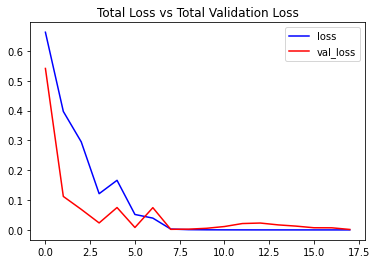

In [18]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

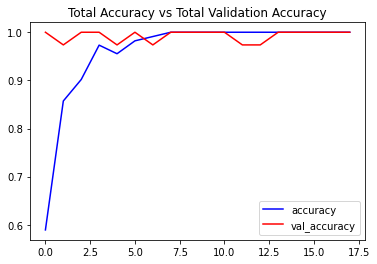

In [19]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


# Accuracy on Test Dataset

In [20]:
acc = 0
for i in range(len(features_test)):
  predicted_label = np.argmax(model.predict(np.expand_dims(features_test[i],axis =0))[0])
  actual_label = np.argmax(labels_test[i])
  if predicted_label == actual_label:
      acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━

In [49]:
# !pip install pickle5

In [50]:
#import pickle

# Assuming your model is stored in a variable called 'model'
# Assuming your model has been trained or loaded and you've made predictions

# Save the model to a pickle file
#with open('model.pkl', 'wb') as f:
   # pickle.dump(model, f)


In [39]:
%%writefile upload.py
import streamlit as st
import cv2
import numpy as np
from collections import deque
import os
import base64
from keras.models import load_model

# Load the model
model_file_path = "/Users/jahnavireddy/Desktop/HARFD/ProjectCode/model/modharfd.h5"  # Change this path accordingly
convlrcn_model = load_model(model_file_path)

# Define constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
SEQUENCE_LENGTH = 20
CLASSES_LIST = ["noFights", "fights"]

def perform_action_recognition(video_file_path, output_file_path):
    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc(*'mp4v'),
                                   int(video_reader.get(cv2.CAP_PROP_FPS)), (original_video_width, original_video_height))

    frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    while video_reader.isOpened():
        ok, frame = video_reader.read()

        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            # Perform action recognition
            predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]

            # Draw predicted class name on frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 0), 2)
            # Draw predicted class name on frame with black background box
            text_size = cv2.getTextSize(predicted_class_name, cv2.FONT_HERSHEY_TRIPLEX, 1, 2)[0]
            text_x, text_y = 10, 30  # Position of the text
            padding = 5  # Padding around the text
            box_coords = ((text_x, text_y + padding), (text_x + text_size[0] + padding * 2, text_y - text_size[1] - padding))

            # Draw the black background box
            cv2.rectangle(frame, box_coords[0], box_coords[1], (0, 0, 0), -1)

            # Draw the predicted class name on the frame
            cv2.putText(frame, predicted_class_name, (text_x + padding, text_y), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 0), 2)

        video_writer.write(frame)

    video_reader.release()
    video_writer.release()

    return output_file_path

def get_binary_file_downloader_html(file_path, title="Download File"):
    with open(file_path, "rb") as f:
        video_bytes = f.read()
    b64 = base64.b64encode(video_bytes).decode()
    file_href = f'<a href="data:file/mp4;base64,{b64}" download="{os.path.basename(file_path)}">{title}</a>'
    return file_href

def main():
    st.title("Human Activity Prediction")

    uploaded_file = st.file_uploader("Upload a video", type=['mp4'])
    if uploaded_file is not None:
        test_videos_directory = 'test_videos'
        os.makedirs(test_videos_directory, exist_ok=True)
        video_file_path = os.path.join(test_videos_directory, uploaded_file.name)
        with open(video_file_path, "wb") as f:
            f.write(uploaded_file.read())
        st.success(f"You uploaded: {uploaded_file.name}")

        output_video_file_path = f'{test_videos_directory}/{uploaded_file.name}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
        output_video_file_path = perform_action_recognition(video_file_path, output_video_file_path)

        st.success("Prediction complete! You can download the output video below.")
        st.markdown(get_binary_file_downloader_html(output_video_file_path, "Download Predicted Video"), unsafe_allow_html=True)

if __name__ == "__main__":
    main()

Writing upload.py


In [48]:
!streamlit run upload.py --server.enableXsrfProtection false


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.20.10.2:8501

2024-05-02 14:17:54.152899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jahnavireddy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [3]:
%%writefile video.py
import streamlit as st
from streamlit_webrtc import webrtc_streamer, VideoTransformerBase
import cv2
import numpy as np
from collections import deque
import os
import base64
from keras.models import load_model

# Load the model
model_file_path = "/Users/jahnavireddy/Desktop/HARFD/ProjectCode/model/modharfd.h5"  # Change this path accordingly
convlrcn_model = load_model(model_file_path)

# Define constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
SEQUENCE_LENGTH = 20
CLASSES_LIST = ["noFights", "fights"]

class VideoTransformer(VideoTransformerBase):
    def _init_(self):
        super()._init_()
        self.frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    def transform(self, frame):
        img = frame.to_ndarray(format="bgr24")

        resized_frame = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        self.frames_queue.append(normalized_frame)

        if len(self.frames_queue) == SEQUENCE_LENGTH:
            predicted_class_name = self.predict_activity(self.frames_queue)

            # Draw predicted class name on frame
            cv2.putText(img, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        return img

    def predict_activity(self, frames_queue):
        # Perform action recognition using the loaded model
        predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
        predicted_label = np.argmax(predicted_labels_probabilities)
        predicted_class_name = CLASSES_LIST[predicted_label]
        return predicted_class_name

def main():
    st.title("Human Activity Prediction")

    webrtc_ctx = webrtc_streamer(key="example", video_transformer_factory=VideoTransformer, async_transform=True)

if __name__ == "__main__":
    main()

Overwriting video.py


In [4]:
!streamlit run video.py --server.enableXsrfProtection false


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.204:8501

2024-05-02 20:19:11.690074: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jahnavireddy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahnavireddy/Desktop/HARFD/ProjectCode/video.py:50: DeprecationWarning: The argument video_transformer_factory is deprecated. Use video_processor_factory instead.
See https://github.com/whitphx/streamlit-webrtc#for-users-since-versions-020
  webrtc_ctx = webrtc_streamer(key

/Users/jahnavireddy/Desktop/HARFD/ProjectCode/video.py:50: DeprecationWarning: The argument video_transformer_factory is deprecated. Use video_processor_factory instead.
See https://github.com/whitphx/streamlit-webrtc#for-users-since-versions-020
  webrtc_ctx = webrtc_streamer(key="example", video_transformer_factory=VideoTransformer, async_transform=True)
/Users/jahnavireddy/Desktop/HARFD/ProjectCode/video.py:50: DeprecationWarning: The argument async_transform is deprecated. Use async_processing instead.
See https://github.com/whitphx/streamlit-webrtc#for-users-since-versions-020
  webrtc_ctx = webrtc_streamer(key="example", video_transformer_factory=VideoTransformer, async_transform=True)
[libx264 @ 0x7fe7c8c61e40] frame I:1     Avg QP:16.93  size: 18027
[libx264 @ 0x7fe7c8c61e40] frame P:37    Avg QP: 9.15  size:  8015
[libx264 @ 0x7fe7c8c61e40] mb I  I16..4: 20.8%  0.0% 79.2%
[libx264 @ 0x7fe7c8c61e40] mb P  I16..4:  0.5%  0.0%  1.0%  P16..4: 43.3% 12.6% 10.3%  0.0%  0.0%    skip:

In [38]:
!pip install streamlit_webrtc

In [7]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [17]:
%%writefile test.py
import streamlit as st
import cv2
import numpy as np
from collections import deque
import os
import base64
from keras.models import load_model
from streamlit_webrtc import webrtc_streamer, VideoTransformerBase

# Load the model
model_file_path = "/Users/jahnavireddy/Desktop/HARFD/ProjectCode/model/modharfd.h5"  # Change this path accordingly
convlrcn_model = load_model(model_file_path)

# Define constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
SEQUENCE_LENGTH = 20
CLASSES_LIST = ["noFights", "fights"]

def perform_action_recognition(video_file_path, output_file_path):
    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc(*'mp4v'),
                                   int(video_reader.get(cv2.CAP_PROP_FPS)), (original_video_width, original_video_height))

    frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    while video_reader.isOpened():
        ok, frame = video_reader.read()

        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            # Perform action recognition
            predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]

            # Draw predicted class name on frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 0), 2)
            # Draw predicted class name on frame with black background box
            text_size = cv2.getTextSize(predicted_class_name, cv2.FONT_HERSHEY_TRIPLEX, 1, 2)[0]
            text_x, text_y = 10, 30  # Position of the text
            padding = 5  # Padding around the text
            box_coords = ((text_x, text_y + padding), (text_x + text_size[0] + padding * 2, text_y - text_size[1] - padding))

            # Draw the black background box
            cv2.rectangle(frame, box_coords[0], box_coords[1], (0, 0, 0), -1)

            # Draw the predicted class name on the frame
            cv2.putText(frame, predicted_class_name, (text_x + padding, text_y), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 0), 2)

        video_writer.write(frame)

    video_reader.release()
    video_writer.release()

    return output_file_path

def get_binary_file_downloader_html(file_path, title="Download File"):
    with open(file_path, "rb") as f:
        video_bytes = f.read()
    b64 = base64.b64encode(video_bytes).decode()
    file_href = f'<a href="data:file/mp4;base64,{b64}" download="{os.path.basename(file_path)}">{title}</a>'
    return file_href


class VideoTransformer(VideoTransformerBase):
    def _init_(self):
        super()._init_()
        self.frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    def transform(self, frame):
        img = frame.to_ndarray(format="bgr24")

        resized_frame = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        self.frames_queue.append(normalized_frame)

        if len(self.frames_queue) == SEQUENCE_LENGTH:
            predicted_class_name = self.predict_activity(self.frames_queue)

            # Draw predicted class name on frame
            cv2.putText(img, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        return img

    def predict_activity(self, frames_queue):
        # Perform action recognition using the loaded model
        predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
        predicted_label = np.argmax(predicted_labels_probabilities)
        predicted_class_name = CLASSES_LIST[predicted_label]
        return predicted_class_name

def main():
    
    st.title("Human Activity Prediction")

    uploaded_file = st.file_uploader("Upload a video", type=['mp4'])
    if uploaded_file is not None:
        test_videos_directory = 'test_videos'
        os.makedirs(test_videos_directory, exist_ok=True)
        video_file_path = os.path.join(test_videos_directory, uploaded_file.name)
        with open(video_file_path, "wb") as f:
            f.write(uploaded_file.read())
        st.success(f"You uploaded: {uploaded_file.name}")

        output_video_file_path = f'{test_videos_directory}/{uploaded_file.name}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
        output_video_file_path = perform_action_recognition(video_file_path, output_video_file_path)

        st.success("Prediction complete! You can download the output video below.")
        st.markdown(get_binary_file_downloader_html(output_video_file_path, "Download Predicted Video"), unsafe_allow_html=True)

    st.title("Human Activity Prediction")

    webrtc_ctx = webrtc_streamer(key="example", video_transformer_factory=VideoTransformer, async_transform=True)

if __name__ == "__main__":
    main()

Overwriting test.py


In [18]:
!streamlit run test.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.204:8501

2024-05-02 20:36:46.624740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jahnavireddy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahnavireddy/Desktop/HARFD/ProjectCode/test.py:123: DeprecationWarning: The argument video_transformer_factory is deprecated. Use video_processor_factory instead.
See https://github.com/whitphx/streamlit-webrtc#for-users-since-versions-020
  webrtc_ctx = webrtc_streamer(key